### 图像金字塔
一般情况下，我们要处理是一副具有固定分辨率的图像。但是有些情况下，我们需要对同一图像的不同分辨率的子图像进行处理。比如，我们要在一幅图像中查找某个目标，比如脸，我们不知道目标在图像中的尺寸大小。这种情况下，我们需要创建创建一组图像，这些图像是具有不同分辨率的原始图像。我们把这组图像叫做图像金字塔（简单来说就是同一图像的不同分辨率的子图集合）。如果我们把最大的图像放在底部，最小的放在顶部，看起来像一座金字塔，故而得名图像金字塔。  
<center><img src="pyramid.png" alt="FAO" width="500"></center>

### 高斯金字塔
高斯金字塔的顶部是通过将底部图像中的连续的行和列去除得到的。顶部图像中的每个像素值等于下一层图像中 5 个像素的高斯加权平均值。这样操作一次一个 MxN 的图像就变成了一个 M/2×N/2 的图像。所以这幅图像的面积就变为原来图像面积的四分之一。连续进行这样的操作我们就会得到一个分辨率不断下降的图像金字塔。我们可以使用函数cv2.pyrDown() 和 cv2.pyrUp() 构建图像金字塔。

### 拉普拉斯金字塔
拉普拉斯金字塔可以由高斯金字塔计算得来，公式如下：
<center>$L_i=G_i-pyrUp(G_{i+1})$</center>
拉普拉金字塔的图像看起来就像边界图，其中很多像素都是 0。

In [1]:
from imutils import *

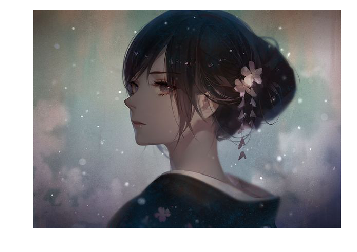

(424, 600, 3)

In [2]:
image = imread('image.jpg')
show(image)
image.shape

(212, 300, 3)


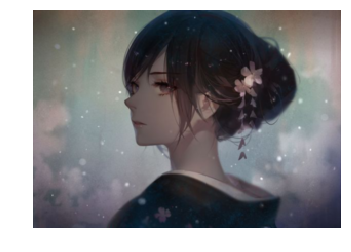

(106, 150, 3)


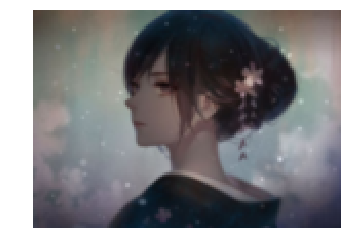

(53, 75, 3)


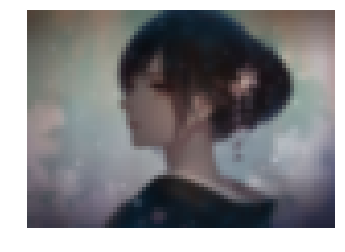

(27, 38, 3)


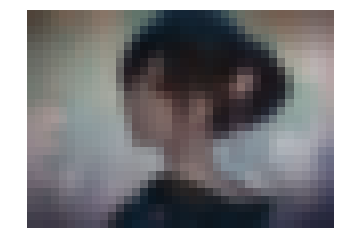

In [3]:
for i in range(4):
    image = cv2.pyrDown(image)
    print(image.shape)
    show(image)

(54, 76, 3)


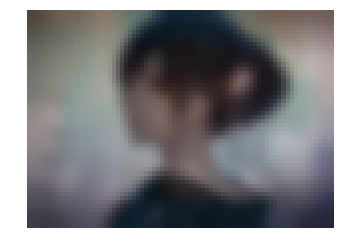

(108, 152, 3)


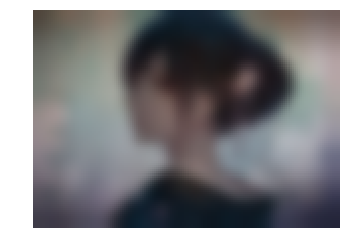

(216, 304, 3)


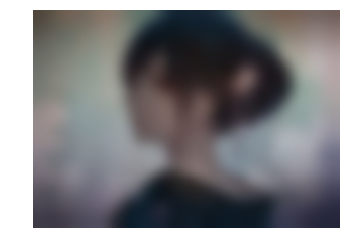

(432, 608, 3)


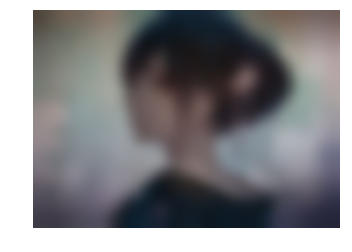

In [4]:
for i in range(4):
    image = cv2.pyrUp(image)
    print(image.shape)
    show(image)

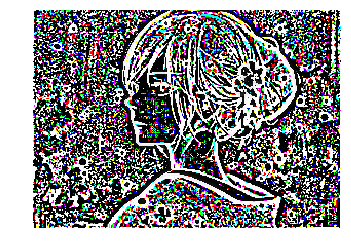

In [5]:
# 拉普拉斯金字塔
image = imread('image.jpg')
down_image1 = cv2.pyrDown(image)
down_image2 = cv2.pyrDown(down_image1)
up_image = cv2.pyrUp(down_image2)
laplacian = down_image1-up_image
show(laplacian)